In [1]:
import gym
import ma_gym 
import numpy as np
import random
import pandas as pd
from ma_gym.envs.traffic_junction import TrafficJunction  
from collections import defaultdict
import nashpy as nash
from dqn import DQNAgent
import matplotlib.pyplot as plt
from ppo import PPOAgent


Matplotlib created a temporary cache directory at /var/folders/fh/fwc37qhn04d8sxp65hwv1kxm0000gn/T/matplotlib-yjwp3tvd because the default path (/Users/gabesmithline/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Seeds for reproducibility
seeds = [0, 1, 2, 3, 4]

# Initialize dictionaries to store results



## 4 Agents

In [3]:
from main import simulation_10_agents, simulation_4_agents, simulation_10_to_4_agents
import copy


avg_training_rewards_f, avg_training_norm_violations_f, sim_violated_f, at_dest_f, first_gen_results_f, middle_gen_results_f, last_gen_results_f = None, None, None, None, None, None, None
for seed in seeds:
    avg_training_rewards, avg_training_norm_violations, sim_violated, at_dest, first_gen_results, middle_gen_results, last_gen_results= simulation_4_agents(seed, False) 
    if seed == seeds[0]:
        avg_training_rewards_f, avg_training_norm_violations_f, sim_violated_f, at_dest_f, first_gen_results_f, middle_gen_results_f, last_gen_results_f= avg_training_rewards, avg_training_norm_violations, sim_violated, at_dest, first_gen_results, middle_gen_results, last_gen_results
        first_gen_results_f = [list(item) for item in first_gen_results_f]
        middle_gen_results_f = [list(item) for item in middle_gen_results_f]
        last_gen_results_f = [list(item) for item in last_gen_results_f]
    else:
        avg_training_rewards_f = [sum(x) / 2 for x in zip(avg_training_rewards_f, avg_training_rewards)]
        print("here")
        print(first_gen_results[0])
        print("here1")
        print(first_gen_results[0][0])


        first_gen_results_f[0][0] = [sum(x) / 2 for x in zip(first_gen_results_f[0][0], first_gen_results[0][0])]
        middle_gen_results_f[0][0] = [sum(x) / 2 for x in zip(middle_gen_results_f[0][0], middle_gen_results[0][0])]
        last_gen_results_f[0][0] = [sum(x) / 2 for x in zip(last_gen_results_f[0][0], last_gen_results[0][0])]

        avg_training_norm_violations_f = avg_training_norm_violations_f.add(avg_training_norm_violations).div(2)
        first_gen_results_f[0][1] = first_gen_results_f[0][1].add(first_gen_results[0][1]).div(2)
        middle_gen_results_f[0][1] = middle_gen_results_f[0][1].add(middle_gen_results[0][1]).div(2)
        last_gen_results_f[0][1] = last_gen_results_f[0][1].add(last_gen_results[0][1]).div(2)

        sim_violated_f = sim_violated_f.add(sim_violated).div(2)
        at_dest_f = [sum(x) / 2 for x in zip(at_dest_f, at_dest)]

#plot results
plt.plot(avg_training_rewards_f, label='Average training reward')
plt.plot(first_gen_results_f[0][0], label='First generation reward')
plt.plot(middle_gen_results_f[0][0], label='Middle generation reward')
plt.plot(last_gen_results_f[0][0], label='Last generation reward')
plt.legend()
plt.title('Average training reward')
plt.xlabel('Episodes')
plt.ylabel('Average reward')
plt.show()


#training violations
costs_from_violations = copy.deepcopy(avg_training_norm_violations_f['total_violations_cost'])
avg_training_norm_violations_f.drop(columns=['seed'], inplace=True)
avg_training_norm_violations_f.drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('AVERAGE Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
avg_training_norm_violations_f.plot(kind='bar', stacked=True)
plt.title('Average training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()

#FIRST GEN TRAINING VIOLATIONS 
costs_from_violations = copy.deepcopy(first_gen_results_f[0][1]['total_violations_cost'])
first_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
first_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('First generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
first_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('First generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()

#MIDDLE GEN TRAINING VIOLATIONS
costs_from_violations = copy.deepcopy(middle_gen_results_f[0][1]['total_violations_cost'])
middle_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
middle_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)
plt.plot(costs_from_violations)
plt.title('Middle generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
middle_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('Middle generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')

plt.show()

#LAST GEN TRAINING VIOLATIONS
costs_from_violations = copy.deepcopy(last_gen_results_f[0][1]['total_violations_cost'])
last_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
last_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)
plt.plot(costs_from_violations)
plt.title('Last generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
last_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('Last generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()




#training violations
costs_from_violations_f = copy.deepcopy(sim_violated_f['total_violations_cost'])
sim_violated_f.drop(columns=['seed'], inplace=True)
sim_violated_f.drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('Costs from violations simulation')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()

# Plot a stacked bar chart
sim_violated_f.plot(kind='bar', stacked=True)
plt.title('Average simulation norm violations')
plt.xlabel('Simulation Run')
plt.ylabel('Average norm violations')
plt.show()

#simulation at destination, avg timeto destination
plt.plot(at_dest_f)
plt.title('Average Steps to destination')
plt.xlabel('Simulation Run')
plt.ylabel('Steps ')
plt.show()








/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/300
Solving for Nash Equilibrium in Generation 1/300
Computing Nash Equilibrium for 16 matches
Episode 1/50


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/50
Episode 3/50
Train on 62 samples
62/62 - 0s - loss: inf - 109ms/epoch - 2ms/sample
Train on 62 samples
62/62 - 0s - loss: 2569.0779 - 95ms/epoch - 2ms/sample
Episode 4/50
Episode 5/50
Train on 62 samples
62/62 - 0s - loss: inf - 119ms/epoch - 2ms/sample
Train on 62 samples
62/62 - 0s - loss: 2532.4629 - 111ms/epoch - 2ms/sample
Train on 62 samples
62/62 - 0s - loss: inf - 127ms/epoch - 2ms/sample
Train on 62 samples
62/62 - 0s - loss: 2540.1357 - 128ms/epoch - 2ms/sample
Episode 6/50
Train on 62 samples
62/62 - 0s - loss: nan - 793us/epoch - 13us/sample
Train on 62 samples
62/62 - 0s - loss: 2564.6882 - 638us/epoch - 10us/sample
Episode 7/50
Train on 62 samples
62/62 - 0s - loss: nan - 701us/epoch - 11us/sample
Train on 62 samples
62/62 - 0s - loss: 2508.8125 - 676us/epoch - 11us/sample
Episode 8/50
Train on 62 samples
62/62 - 0s - loss: nan - 752us/epoch - 12us/sample
Train on 62 samples
62/62 - 0s - loss: 2844.0115 - 630us/epoch - 10us/sample
Episode 9/50
Episode 10/50
T

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/300
Solving for Nash Equilibrium in Generation 1/300
Computing Nash Equilibrium for 16 matches
Episode 1/50


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/50
Train on 62 samples
62/62 - 0s - loss: inf - 198ms/epoch - 3ms/sample
Train on 62 samples
62/62 - 0s - loss: 2559.8262 - 193ms/epoch - 3ms/sample
Episode 3/50
Episode 4/50
Train on 62 samples
62/62 - 0s - loss: inf - 212ms/epoch - 3ms/sample
Train on 62 samples
62/62 - 0s - loss: 2542.2522 - 204ms/epoch - 3ms/sample
Train on 62 samples
62/62 - 0s - loss: inf - 228ms/epoch - 4ms/sample
Train on 62 samples
62/62 - 0s - loss: 2542.8218 - 224ms/epoch - 4ms/sample
Episode 5/50
Train on 62 samples
62/62 - 0s - loss: nan - 878us/epoch - 14us/sample
Train on 62 samples
62/62 - 0s - loss: 2555.2856 - 724us/epoch - 12us/sample
Episode 6/50
Train on 62 samples
62/62 - 0s - loss: inf - 249ms/epoch - 4ms/sample
Train on 62 samples
62/62 - 0s - loss: 220.1969 - 240ms/epoch - 4ms/sample
Train on 62 samples
62/62 - 0s - loss: nan - 810us/epoch - 13us/sample
Train on 62 samples
62/62 - 0s - loss: 1334.5574 - 659us/epoch - 11us/sample
Episode 7/50
Train on 62 samples
62/62 - 0s - loss: nan 

: 

## 10 Agents

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

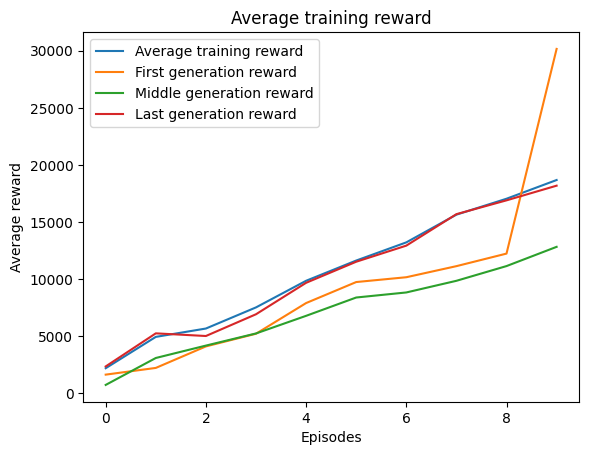

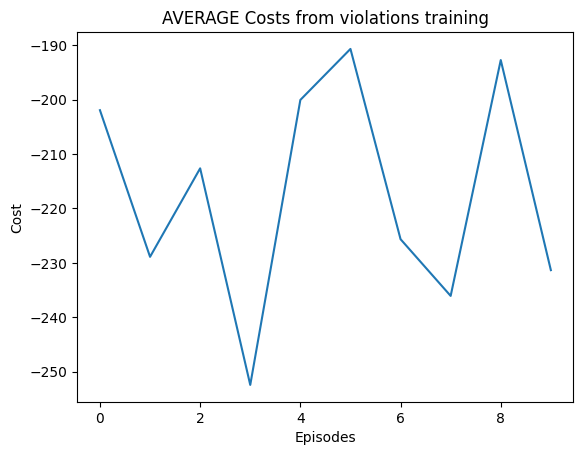

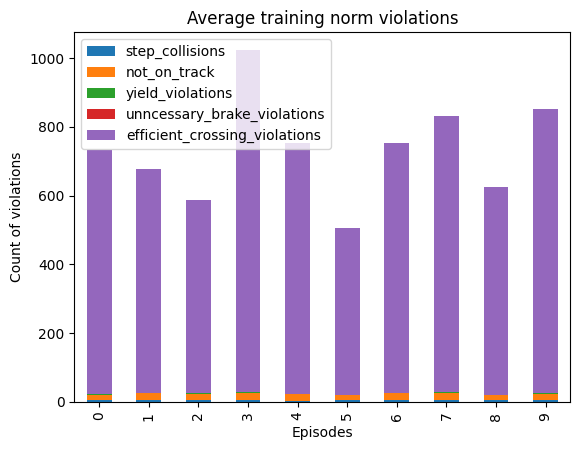

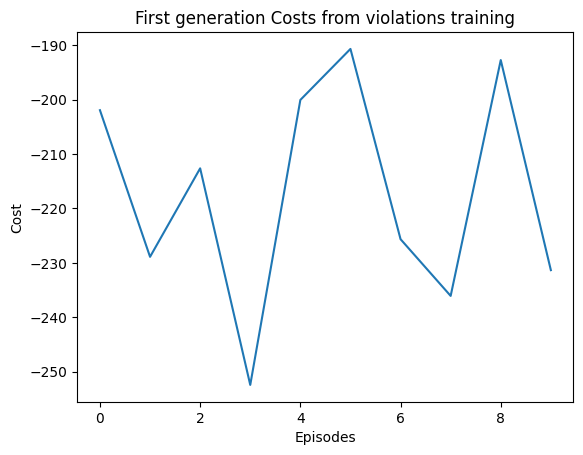

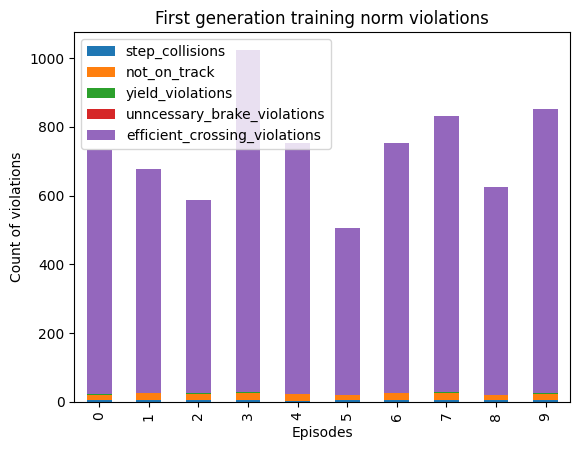

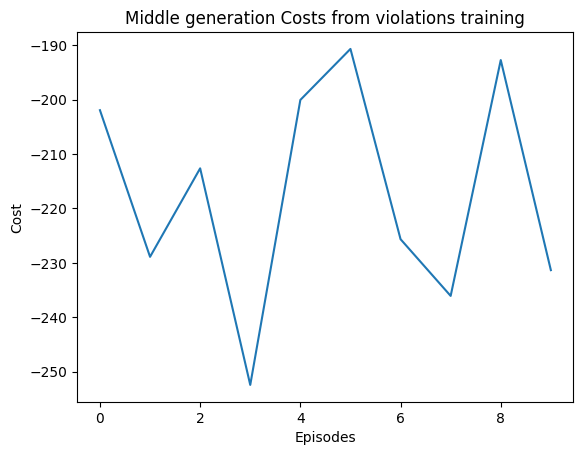

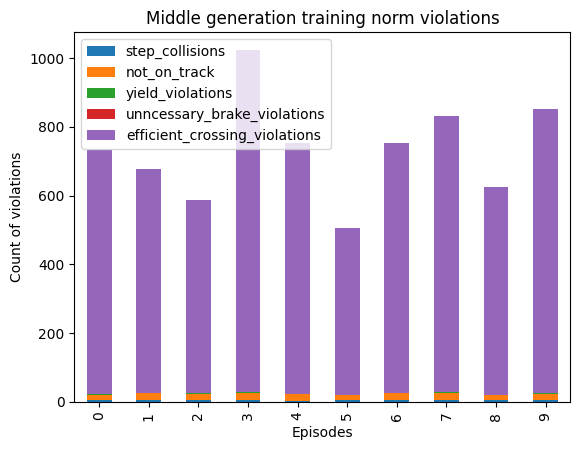

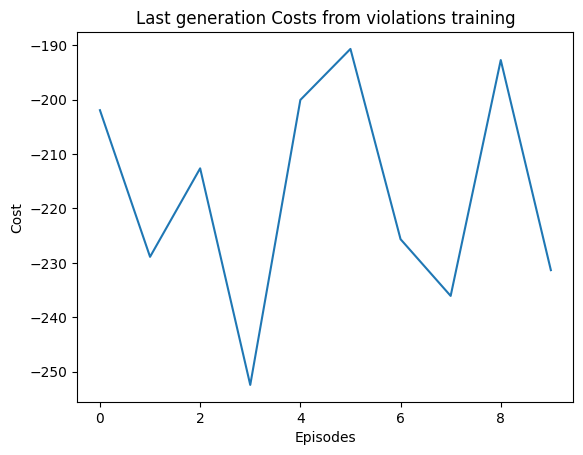

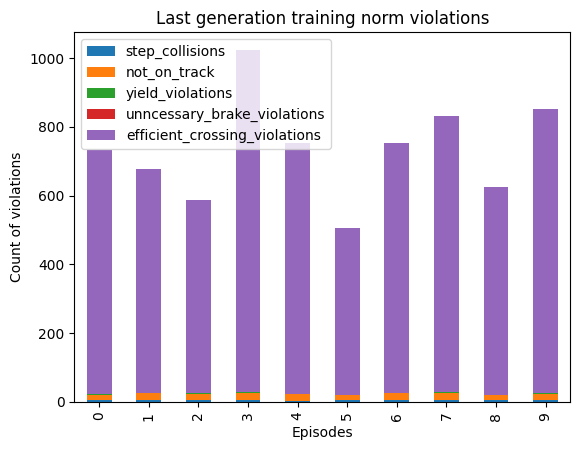

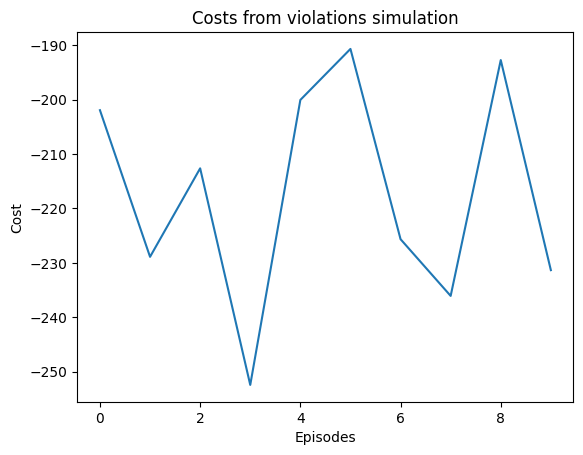

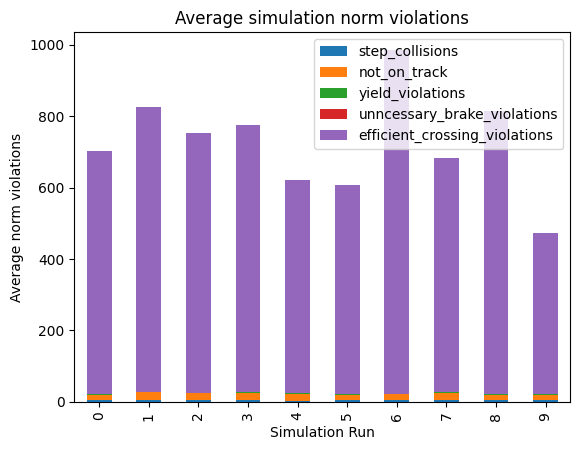

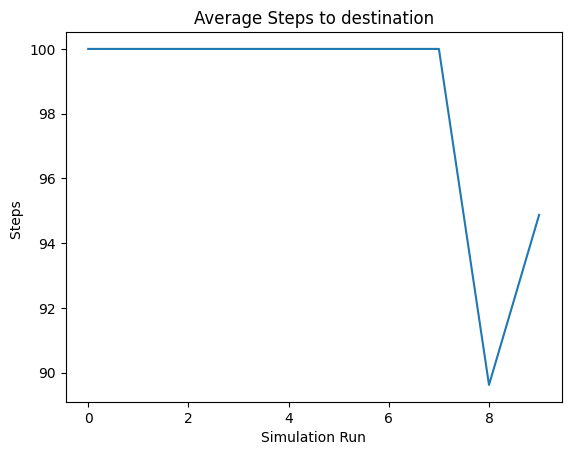

In [ ]:
avg_training_rewards_f, avg_training_norm_violations_f, sim_violated_f, at_dest_f, first_gen_results_f, middle_gen_results_f, last_gen_results_f = None, None, None, None, None, None, None
for seed in seeds:
    avg_training_rewards, avg_training_norm_violations, sim_violated, at_dest, first_gen_results, middle_gen_results, last_gen_results= simulation_10_agents(seed, False) 
    if seed == seeds[0]:
        avg_training_rewards_f, avg_training_norm_violations_f, sim_violated_f, at_dest_f, first_gen_results_f, middle_gen_results_f, last_gen_results_f= avg_training_rewards, avg_training_norm_violations, sim_violated, at_dest, first_gen_results, middle_gen_results, last_gen_results
        first_gen_results_f = [list(item) for item in first_gen_results_f]
        middle_gen_results_f = [list(item) for item in middle_gen_results_f]
        last_gen_results_f = [list(item) for item in last_gen_results_f]
    else:
        avg_training_rewards_f = [sum(x) / 2 for x in zip(avg_training_rewards_f, avg_training_rewards)]
        print("here")
        print(first_gen_results[0])
        print("here1")
        print(first_gen_results[0][0])


        first_gen_results_f[0][0] = [sum(x) / 2 for x in zip(first_gen_results_f[0][0], first_gen_results[0][0])]
        middle_gen_results_f[0][0] = [sum(x) / 2 for x in zip(middle_gen_results_f[0][0], middle_gen_results[0][0])]
        last_gen_results_f[0][0] = [sum(x) / 2 for x in zip(last_gen_results_f[0][0], last_gen_results[0][0])]

        avg_training_norm_violations_f = avg_training_norm_violations_f.add(avg_training_norm_violations).div(2)
        first_gen_results_f[0][1] = first_gen_results_f[0][1].add(first_gen_results[0][1]).div(2)
        middle_gen_results_f[0][1] = middle_gen_results_f[0][1].add(middle_gen_results[0][1]).div(2)
        last_gen_results_f[0][1] = last_gen_results_f[0][1].add(last_gen_results[0][1]).div(2)

        sim_violated_f = sim_violated_f.add(sim_violated).div(2)
        at_dest_f = [sum(x) / 2 for x in zip(at_dest_f, at_dest)]

#plot results
plt.plot(avg_training_rewards_f, label='Average training reward')
plt.plot(first_gen_results_f[0][0], label='First generation reward')
plt.plot(middle_gen_results_f[0][0], label='Middle generation reward')
plt.plot(last_gen_results_f[0][0], label='Last generation reward')
plt.legend()
plt.title('Average training reward')
plt.xlabel('Episodes')
plt.ylabel('Average reward')
plt.show()


#training violations
costs_from_violations = copy.deepcopy(avg_training_norm_violations_f['total_violations_cost'])
avg_training_norm_violations_f.drop(columns=['seed'], inplace=True)
avg_training_norm_violations_f.drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('AVERAGE Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
avg_training_norm_violations_f.plot(kind='bar', stacked=True)
plt.title('Average training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()

#FIRST GEN TRAINING VIOLATIONS 
costs_from_violations = copy.deepcopy(first_gen_results_f[0][1]['total_violations_cost'])
first_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
first_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('First generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
first_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('First generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()

#MIDDLE GEN TRAINING VIOLATIONS
costs_from_violations = copy.deepcopy(middle_gen_results_f[0][1]['total_violations_cost'])
middle_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
middle_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)
plt.plot(costs_from_violations)
plt.title('Middle generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
middle_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('Middle generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')

plt.show()

#LAST GEN TRAINING VIOLATIONS
costs_from_violations = copy.deepcopy(last_gen_results_f[0][1]['total_violations_cost'])
last_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
last_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)
plt.plot(costs_from_violations)
plt.title('Last generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
last_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('Last generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()




#training violations
costs_from_violations_f = copy.deepcopy(sim_violated_f['total_violations_cost'])
sim_violated_f.drop(columns=['seed'], inplace=True)
sim_violated_f.drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('Costs from violations simulation')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()

# Plot a stacked bar chart
sim_violated_f.plot(kind='bar', stacked=True)
plt.title('Average simulation norm violations')
plt.xlabel('Simulation Run')
plt.ylabel('Average norm violations')
plt.show()

#simulation at destination, avg timeto destination
plt.plot(at_dest_f)
plt.title('Average Steps to destination')
plt.xlabel('Simulation Run')
plt.ylabel('Steps ')
plt.show()






## 10 Agents to 4 Transfer

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Episode 0 done
Episode 1 done
Episode 2 done
Episode 3 done
Episode 4 done
Episode 4 done
Total steps: 1
Episode 5 done
Episode 6 done
Episode 7 done
Episode 8 done
Episode 9 done
   seed  step_collisions  not_on_track  yield_violations  \
0  42.0              0.0          14.0               0.0   
1  42.0              0.0           8.0               0.0   
2  42.0              0.0           8.0               0.0   
3  42.0              0.0           8.0               0.0   
4  42.0              0.0           4.0               0.0   
5  42.0              0.0          19.0               0.0   
6  42.0              0.0           8.0               0.0   
7  42.0              0.0           8.0               0.0   
8  42.0              1.0          12.0               0.0   
9  42.0              0.0           7.0               0.0   

   unncessary_brake_violations  efficient_crossing_violations  \
0                          0.0                          188.0   
1                          0.

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Episode 0 done
Episode 1 done
Episode 2 done
Episode 2 done
Total steps: 13
Episode 3 done
Episode 4 done
Episode 5 done
Episode 6 done
Episode 7 done
Episode 8 done
Episode 9 done
   seed  step_collisions  not_on_track  yield_violations  \
0  42.0              0.0           8.0               0.0   
1  42.0              0.0           7.0               0.0   
2  42.0              1.0           2.0               0.0   
3  42.0              0.0          14.0               0.0   
4  42.0              0.0          13.0               0.0   
5  42.0              0.0          24.0               0.0   
6  42.0              1.0           7.0               0.0   
7  42.0              0.0          18.0               0.0   
8  42.0              0.0          14.0               0.0   
9  42.0              0.0           7.0               0.0   

   unncessary_brake_violations  efficient_crossing_violations  \
0                          0.0                          118.0   
1                          0

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Episode 0 done
Episode 1 done
Episode 2 done
Episode 3 done
Episode 4 done
Episode 5 done
Episode 6 done
Episode 6 done
Total steps: 13
Episode 7 done
Episode 8 done
Episode 8 done
Total steps: 13
Episode 9 done
Episode 9 done
Total steps: 13
   seed  step_collisions  not_on_track  yield_violations  \
0  42.0              0.0           8.0               0.0   
1  42.0              0.0          13.0               0.0   
2  42.0              0.0           7.0               0.0   
3  42.0              1.0           6.0               0.0   
4  42.0              0.0          13.0               0.0   
5  42.0              0.0           8.0               0.0   
6  42.0              4.0           0.0               0.0   
7  42.0              0.0          13.0               0.0   
8  42.0              0.0           3.0               0.0   
9  42.0              0.0           1.0               0.0   

   unncessary_brake_violations  efficient_crossing_violations  \
0                          0.0 

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Episode 0 done
Episode 1 done
Episode 2 done
Episode 3 done
Episode 4 done
Episode 5 done
Episode 5 done
Total steps: 13
Episode 6 done
Episode 7 done
Episode 8 done
Episode 9 done
Episode 9 done
Total steps: 13
   seed  step_collisions  not_on_track  yield_violations  \
0  42.0              1.0           7.0               0.0   
1  42.0              1.0           6.0               0.0   
2  42.0              0.0          12.0               0.0   
3  42.0              0.0          12.0               0.0   
4  42.0              0.0           8.0               0.0   
5  42.0              1.0           2.0               0.0   
6  42.0              0.0           8.0               0.0   
7  42.0              0.0          12.0               0.0   
8  42.0              1.0           7.0               0.0   
9  42.0              1.0           2.0               0.0   

   unncessary_brake_violations  efficient_crossing_violations  \
0                          0.0                          142.0 

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Overriding environment TrafficJunction4-v0
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Generation 1/10
Solving for Nash Equilibrium in Generation 1/10
Computing Nash Equilibrium for 100 matches
Episode 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 2/10
Solving for Nash Equilibrium in Generation 2/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 3/10
Solving for Nash Equilibrium in Generation 3/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 4/10
Solving for Nash Equilibrium in Generation 4/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5/10
Episode 6/10
Episode 7/10
Episode 8/10
Episode 9/10
Episode 10/10
Generation 5/10
Solving for Nash Equilibrium in Generation 5/10
Computing Nash Equilibrium for 100 matches
Episode 1/10
Episode 2/10
Episode 3/10
Episode 4/10
Episode 5

/opt/homebrew/lib/python3.11/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Episode 0 done
Episode 1 done
Episode 2 done
Episode 3 done
Episode 4 done
Episode 5 done
Episode 6 done
Episode 7 done
Episode 8 done
Episode 9 done
   seed  step_collisions  not_on_track  yield_violations  \
0  42.0              0.0           6.0               0.0   
1  42.0              0.0          12.0               0.0   
2  42.0              0.0          14.0               0.0   
3  42.0              0.0          13.0               0.0   
4  42.0              1.0           7.0               0.0   
5  42.0              1.0           7.0               0.0   
6  42.0              0.0           9.0               0.0   
7  42.0              0.0           8.0               0.0   
8  42.0              2.0           6.0               0.0   
9  42.0              0.0           8.0               0.0   

   unncessary_brake_violations  efficient_crossing_violations  \
0                          0.0                          166.0   
1                          0.0                          236

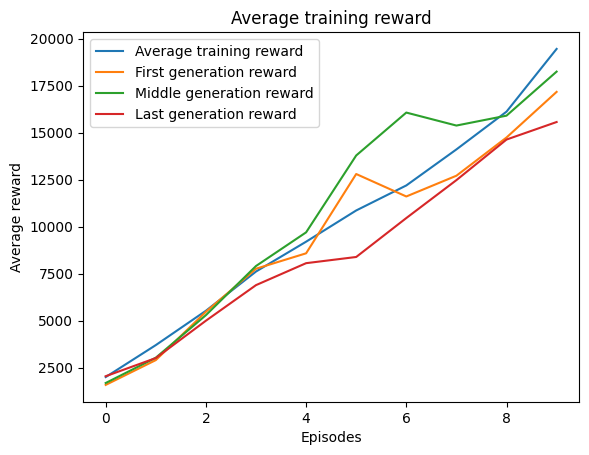

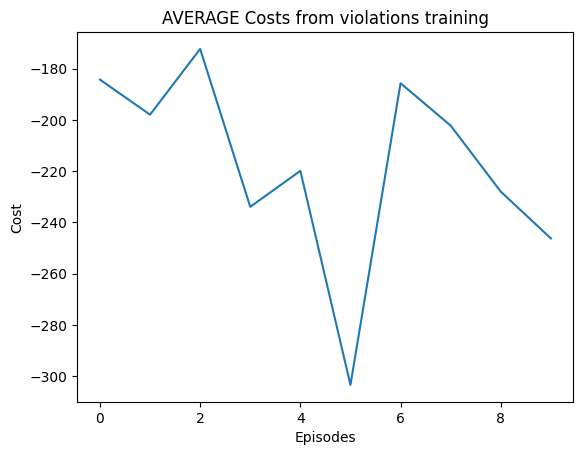

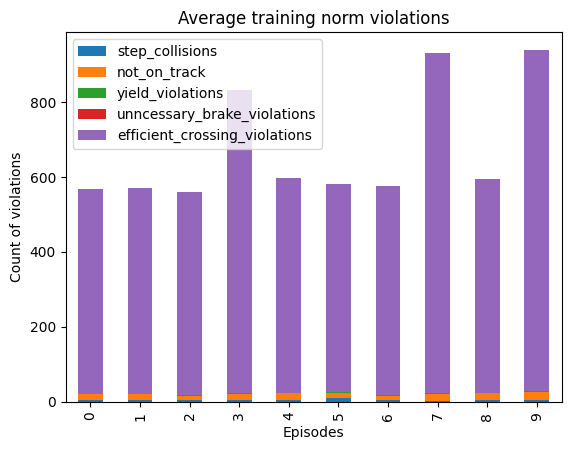

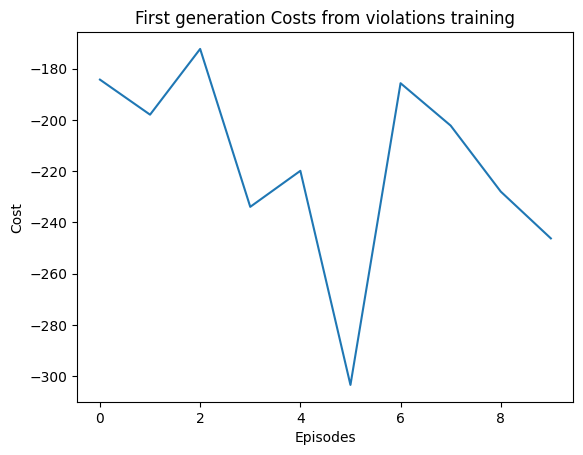

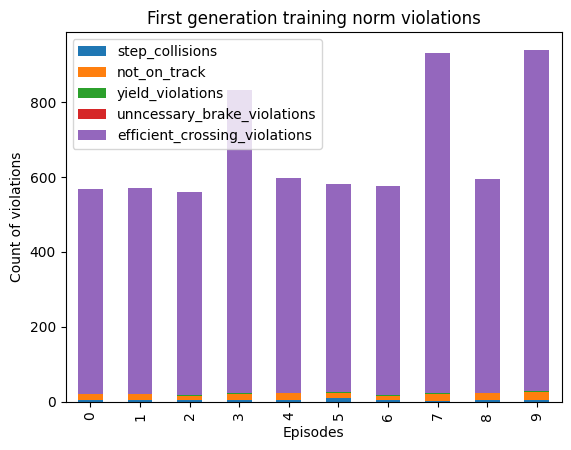

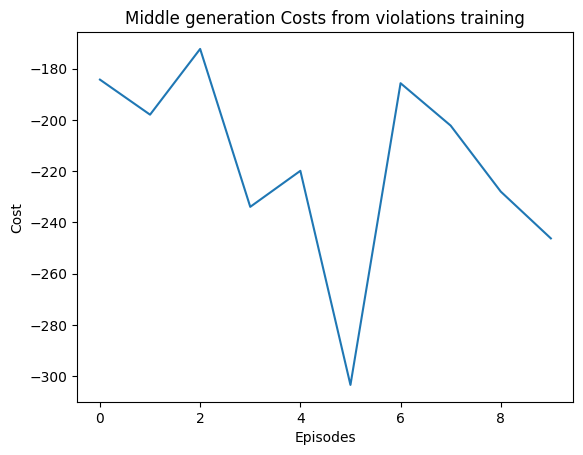

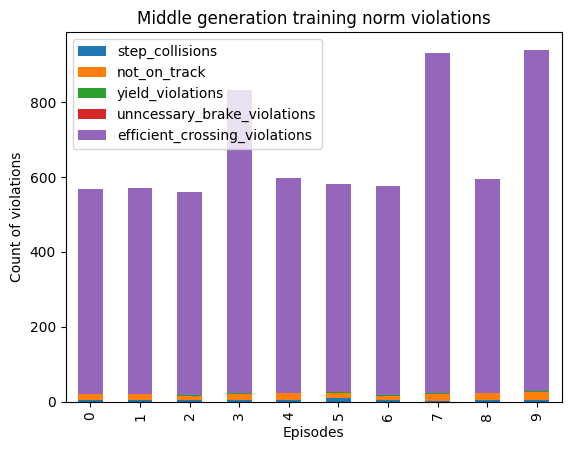

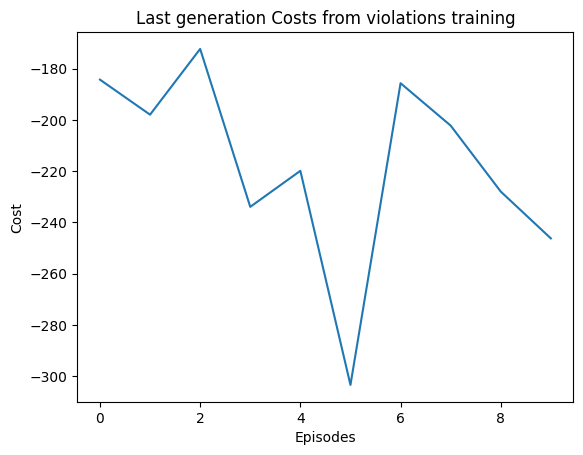

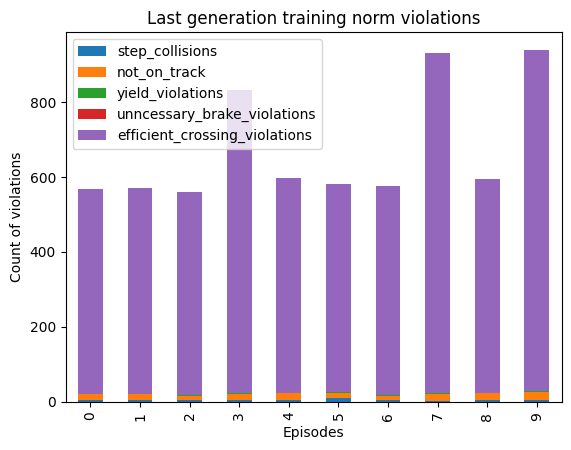

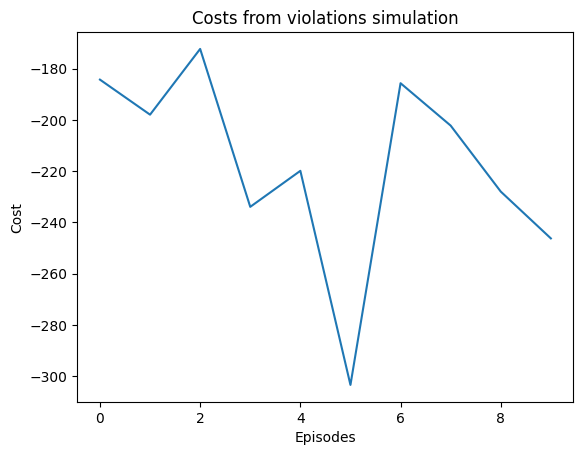

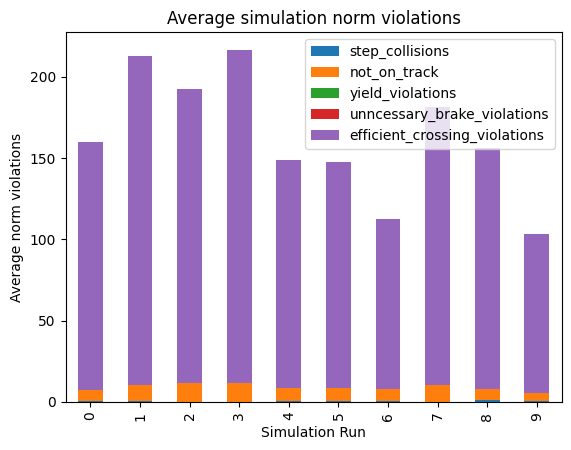

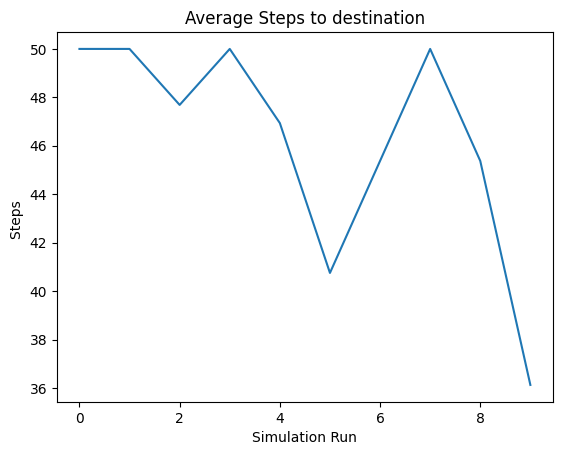

In [ ]:
avg_training_rewards_f, avg_training_norm_violations_f, sim_violated_f, at_dest_f, first_gen_results_f, middle_gen_results_f, last_gen_results_f = None, None, None, None, None, None, None
for seed in seeds:
    avg_training_rewards, avg_training_norm_violations, sim_violated, at_dest, first_gen_results, middle_gen_results, last_gen_results= simulation_10_to_4_agents(seed, False) 
    if seed == seeds[0]:
        avg_training_rewards_f, avg_training_norm_violations_f, sim_violated_f, at_dest_f, first_gen_results_f, middle_gen_results_f, last_gen_results_f= avg_training_rewards, avg_training_norm_violations, sim_violated, at_dest, first_gen_results, middle_gen_results, last_gen_results
        first_gen_results_f = [list(item) for item in first_gen_results_f]
        middle_gen_results_f = [list(item) for item in middle_gen_results_f]
        last_gen_results_f = [list(item) for item in last_gen_results_f]
    else:
        avg_training_rewards_f = [sum(x) / 2 for x in zip(avg_training_rewards_f, avg_training_rewards)]
        print("here")
        print(first_gen_results[0])
        print("here1")
        print(first_gen_results[0][0])


        first_gen_results_f[0][0] = [sum(x) / 2 for x in zip(first_gen_results_f[0][0], first_gen_results[0][0])]
        middle_gen_results_f[0][0] = [sum(x) / 2 for x in zip(middle_gen_results_f[0][0], middle_gen_results[0][0])]
        last_gen_results_f[0][0] = [sum(x) / 2 for x in zip(last_gen_results_f[0][0], last_gen_results[0][0])]

        avg_training_norm_violations_f = avg_training_norm_violations_f.add(avg_training_norm_violations).div(2)
        first_gen_results_f[0][1] = first_gen_results_f[0][1].add(first_gen_results[0][1]).div(2)
        middle_gen_results_f[0][1] = middle_gen_results_f[0][1].add(middle_gen_results[0][1]).div(2)
        last_gen_results_f[0][1] = last_gen_results_f[0][1].add(last_gen_results[0][1]).div(2)

        sim_violated_f = sim_violated_f.add(sim_violated).div(2)
        at_dest_f = [sum(x) / 2 for x in zip(at_dest_f, at_dest)]

#plot results
plt.plot(avg_training_rewards_f, label='Average training reward')
plt.plot(first_gen_results_f[0][0], label='First generation reward')
plt.plot(middle_gen_results_f[0][0], label='Middle generation reward')
plt.plot(last_gen_results_f[0][0], label='Last generation reward')
plt.legend()
plt.title('Average training reward')
plt.xlabel('Episodes')
plt.ylabel('Average reward')
plt.show()


#training violations
costs_from_violations = copy.deepcopy(avg_training_norm_violations_f['total_violations_cost'])
avg_training_norm_violations_f.drop(columns=['seed'], inplace=True)
avg_training_norm_violations_f.drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('AVERAGE Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
avg_training_norm_violations_f.plot(kind='bar', stacked=True)
plt.title('Average training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()

#FIRST GEN TRAINING VIOLATIONS 
costs_from_violations = copy.deepcopy(first_gen_results_f[0][1]['total_violations_cost'])
first_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
first_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('First generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
first_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('First generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()

#MIDDLE GEN TRAINING VIOLATIONS
costs_from_violations = copy.deepcopy(middle_gen_results_f[0][1]['total_violations_cost'])
middle_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
middle_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)
plt.plot(costs_from_violations)
plt.title('Middle generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
middle_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('Middle generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')

plt.show()

#LAST GEN TRAINING VIOLATIONS
costs_from_violations = copy.deepcopy(last_gen_results_f[0][1]['total_violations_cost'])
last_gen_results_f[0][1].drop(columns=['seed'], inplace=True)
last_gen_results_f[0][1].drop(columns=['total_violations_cost'], inplace=True)
plt.plot(costs_from_violations)
plt.title('Last generation Costs from violations training')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()
last_gen_results_f[0][1].plot(kind='bar', stacked=True)
plt.title('Last generation training norm violations')
plt.xlabel('Episodes')
plt.ylabel('Count of violations')
plt.show()




#training violations
costs_from_violations_f = copy.deepcopy(sim_violated_f['total_violations_cost'])
sim_violated_f.drop(columns=['seed'], inplace=True)
sim_violated_f.drop(columns=['total_violations_cost'], inplace=True)

#graph costs from violations
plt.plot(costs_from_violations)
plt.title('Costs from violations simulation')
plt.xlabel('Episodes')
plt.ylabel('Cost')
plt.show()

# Plot a stacked bar chart
sim_violated_f.plot(kind='bar', stacked=True)
plt.title('Average simulation norm violations')
plt.xlabel('Simulation Run')
plt.ylabel('Average norm violations')
plt.show()

#simulation at destination, avg timeto destination
plt.plot(at_dest_f)
plt.title('Average Steps to destination')
plt.xlabel('Simulation Run')
plt.ylabel('Steps ')
plt.show()






